In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('dsgn_cleaned.csv')

In [5]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_type,job_type_num,seniority,seniority_num,figma_yn,adobe_yn,cad_yn,html_css_js_yn,photo_yn,graphic_yn
0,Product Designer,$129K-$153K (Glassdoor est.),About Quora:\n\n\nThe vast majority of human k...,4.1,Quora\n4.1,"Mountain View, CA","Mountain View, CA",201 to 500 employees,2009,Company - Private,...,unspecified,6,unspecified,2,0,0,0,1,0,0
1,Product Designer: Subscriptions,$129K-$153K (Glassdoor est.),Job Description\nThe Washington Post is seekin...,4.2,The Washington Post\n4.2,"Washington, DC","Washington, DC",1001 to 5000 employees,1877,Company - Private,...,unspecified,6,unspecified,2,0,1,0,0,0,0
2,Fire Sprinkler System Designer,$129K-$153K (Glassdoor est.),Absolute Fire Protection is looking for qualif...,3.0,"Absolute Fire Protection, Inc.\n3.0","Rockford, IL","Rockford, IL",1 to 50 employees,2006,Company - Private,...,unspecified,1,unspecified,2,0,0,0,0,0,0
3,Art Director,$129K-$153K (Glassdoor est.),We just keep growing. It’s amazing. Seriously....,4.5,Paradowski Creative\n4.5,"Webster Groves, St. Louis, MO","Webster Groves, MO",51 to 200 employees,1977,Company - Private,...,graphic designer,1,unspecified,2,0,0,0,0,1,0
4,AV Systems Designer,$129K-$153K (Glassdoor est.),General Function:\n\nReporting to the Regional...,4.0,Spinitar\n4.0,"Carlsbad, CA","La Mirada, CA",51 to 200 employees,1986,Company - Private,...,unspecified,1,unspecified,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,Architectural Designer,$94K-$187K (Glassdoor est.),"At Gannett Fleming, we believe in improving th...",4.0,Gannett Fleming\n4.0,"New York, NY","Camp Hill, PA",1001 to 5000 employees,1915,Company - Private,...,structural,1,unspecified,2,0,0,1,0,1,0
922,"Designer, Product",$94K-$187K (Glassdoor est.),About Morningstar\nMorningstar brings inspired...,4.0,Morningstar\n4.0,"Chicago, IL","Chicago, IL",5001 to 10000 employees,1984,Company - Public,...,unspecified,1,unspecified,2,0,1,0,1,0,0
923,Senior Product Design/UX Manager,$94K-$187K (Glassdoor est.),"By applying to this position, your application...",3.2,Wayfair\n3.2,"Boston, MA","Boston, MA",10000+ employees,2002,Company - Public,...,ui/ux,1,senior,1,0,0,0,0,0,0
924,Senior User Experience Designer,$94K-$187K (Glassdoor est.),Management Controls is looking for a high-impa...,4.1,Management Controls\n4.1,"Houston, TX","Houston, TX",51 to 200 employees,1989,Company - Private,...,ui/ux,1,senior,1,1,0,0,1,0,0


In [6]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'LAT', 'LON', 'Seniority', 'Minimum Estimate', 'Maximum Estimate',
       'City', 'State', 'AvgSalary', 'jobhq', 'age', 'job_type',
       'job_type_num', 'seniority', 'seniority_num', 'figma_yn', 'adobe_yn',
       'cad_yn', 'html_css_js_yn', 'photo_yn', 'graphic_yn'],
      dtype='object')

In [7]:
df_model=df[['AvgSalary','Rating','jobhq','age', 'figma_yn', 'adobe_yn',
       'cad_yn', 'html_css_js_yn', 'photo_yn', 'graphic_yn',
             'job_type_num','seniority_num']]

In [8]:
df_model

,AvgSalary,Rating,jobhq,age,figma_yn,adobe_yn,cad_yn,html_css_js_yn,photo_yn,graphic_yn,job_type_num,seniority_num
0,141.0,4.1,1,11,0,0,0,1,0,0,6,2
1,141.0,4.2,1,143,0,1,0,0,0,0,6,2
2,141.0,3.0,1,14,0,0,0,0,0,0,1,2
3,141.0,4.5,0,43,0,0,0,0,1,0,1,2
4,141.0,4.0,0,34,0,0,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
921,140.5,4.0,0,105,0,0,1,0,1,0,1,2
922,140.5,4.0,1,36,0,1,0,1,0,0,1,2
923,140.5,3.2,1,18,0,0,0,0,0,0,1,1
924,140.5,4.1,1,31,1,0,0,1,0,0,1,1


In [9]:
df_dum=pd.get_dummies(df_model)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=df_dum.drop('AvgSalary',axis=1)
y=df_dum.AvgSalary.values

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [13]:
X_test

,Rating,jobhq,age,figma_yn,adobe_yn,cad_yn,html_css_js_yn,photo_yn,graphic_yn,job_type_num,seniority_num
3,4.5,0,43,0,0,0,0,1,0,1,2
703,3.9,0,34,0,1,0,0,1,1,1,2
109,3.2,0,46,0,1,0,0,1,1,6,2
351,3.9,0,35,0,0,1,0,0,1,1,2
93,3.7,0,169,0,0,0,0,0,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...
103,3.3,1,18,0,0,0,1,0,1,1,2
220,4.0,1,32,0,1,0,1,0,1,4,2
495,4.1,1,31,1,0,0,1,0,0,1,1
652,4.6,1,32,0,1,0,0,0,1,2,2


In [14]:
X_test.columns

Index(['Rating', 'jobhq', 'age', 'figma_yn', 'adobe_yn', 'cad_yn',
       'html_css_js_yn', 'photo_yn', 'graphic_yn', 'job_type_num',
       'seniority_num'],
      dtype='object')

In [15]:
import statsmodels.api as sm

In [16]:
X_sm=X=sm.add_constant(X)
model=sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     6.738
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           6.02e-11
Time:                        15:00:03   Log-Likelihood:                -4699.8
No. Observations:                 926   AIC:                             9424.
Df Residuals:                     914   BIC:                             9482.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            100.7801     11.663      8.641      0.000      77.891     123.669
Rating             7.2298      2.265      3.193      0.001       2.785      11.674
jobhq             -8.1424      2.947     -2.763      0.006     -13.927      -2.358
age               -0.1682      0.042     -4.029      0.000      -0.250      -0.086
figma_yn           5.0360      5.015      1.004      0.316      -4.807      14.879
adobe_yn          -9.0790      2.992     -3.035      0.002     -14.950      -3.208
cad_yn             9.7917      3.309      2.959      0.003       3.297      16.287
html_css_js_yn    -2.6469      3.562     -0.743      0.458      -9.638       4.344
photo_yn           7.8763      2.969      2.653      0.008       2.050      13.703
graphic_yn         3.8432      2.918      1.317      0.188      -1.884       9.570
job_type_num      -2.0822      0.747     -2.787      0.005      -3.549      -0.616
seniority_num     -3.2927      3.144     -1.047      0.295      -9.464       2.878
==============================================================================
Omnibus:                      121.980   Durbin-Watson:                   0.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.988
Skew:                          -1.047   Prob(JB):                     7.42e-38
Kurtosis:                       2.775   Cond. No.                         448.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [18]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error', cv=3))

-34.206792894023124

In [20]:
lm_l=Lasso(alpha=.19)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train,scoring='neg_mean_absolute_error', cv=3))

-34.443635123416584

In [21]:
alpha=[]
error=[]
for i in range(1,100):
    alpha.append(i/100)
    lml=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train,scoring='neg_mean_absolute_error', cv=3)))

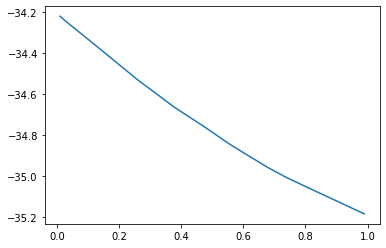

In [22]:
plt.plot(alpha,error)

In [23]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.01,-34.220066


In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf=RandomForestRegressor()
rf1=rf.fit(X_train,y_train)
np.mean(cross_val_score(rf1,X_train,y_train,scoring='neg_mean_absolute_error', cv=3))

-12.251822113484167

In [26]:
import joblib

In [27]:
joblib.dump(rf1,'dsgn_model.pkl')
model=joblib.load('dsgn_model.pkl')
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

135.27031240441818

In [28]:
df_model

,AvgSalary,Rating,jobhq,age,figma_yn,adobe_yn,cad_yn,html_css_js_yn,photo_yn,graphic_yn,job_type_num,seniority_num
0,141.0,4.1,1,11,0,0,0,1,0,0,6,2
1,141.0,4.2,1,143,0,1,0,0,0,0,6,2
2,141.0,3.0,1,14,0,0,0,0,0,0,1,2
3,141.0,4.5,0,43,0,0,0,0,1,0,1,2
4,141.0,4.0,0,34,0,0,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
921,140.5,4.0,0,105,0,0,1,0,1,0,1,2
922,140.5,4.0,1,36,0,1,0,1,0,0,1,2
923,140.5,3.2,1,18,0,0,0,0,0,0,1,1
924,140.5,4.1,1,31,1,0,0,1,0,0,1,1
